In [1]:
import zipfile

with zipfile.ZipFile('./../data/earth_day_missions.csv.zip', 'r') as myzip:
    myzip.extract('earth_day_missions.csv', './../data/')
    myzip.close()

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('./../data/earth_day_missions.csv', index_col=0, low_memory=False)
df = df[~df['ignored']]
df = df[['start_date', 'user', 'missionId', 'missionType', 'missionSubType', 'period', 'target', 'title', 'satisfied', 'performance']]

df['start_date'] = pd.to_datetime(df['start_date'])
df['user'] = df['user'].astype('category').cat.codes
df['missionId'] = df['missionId'].astype('category').cat.codes
df['missionType'] = df['missionType'].astype('category')
df['missionSubType'] = df['missionSubType'].astype('category')
df['period'] = df['period'].astype('category')

df = df.sort_values(by=['start_date'], ignore_index=True)

df

,start_date,user,missionId,missionType,missionSubType,period,target,title,satisfied,performance
0,2024-03-25,21190,30,TICKET,TICKET,CUSTOM,1,ticket,True,1.0
1,2024-03-25,18882,30,TICKET,TICKET,CUSTOM,1,ticket,True,1.0
2,2024-03-25,17304,14,MEASURE,TYPEFORM_BASE,CUSTOM,1,calculate_carbon_footprint,True,1.0
3,2024-03-25,17304,16,LEARN,JOURNEY,CUSTOM,1,complete_journey,True,1.0
4,2024-03-25,17304,30,TICKET,TICKET,CUSTOM,1,ticket,True,1.0
...,...,...,...,...,...,...,...,...,...,...
45115,2024-04-20,8951,28,LEARN,DAILYEPISODE,DAILY,1,watch_the_daily_episode,True,1.0
45116,2024-04-20,8951,32,CHECKIN,CHECKIN,DAILY,1,do_checkin,True,1.0
45117,2024-04-20,22776,3,CHECKIN,CHECKIN,DAILY,1,do_checkin,True,1.0
45118,2024-04-20,19837,28,LEARN,DAILYEPISODE,DAILY,1,watch_the_daily_episode,True,1.0


In [3]:
summary = df.groupby(['missionId', 'title', 'missionType', 'missionSubType', 'period', 'target', 'satisfied'], observed=True).size().unstack(fill_value=0)
summary.sort_index(level=[2, 3, 4, 5], inplace=True)

summary

,,,,,satisfied,False,True
missionId,title,missionType,missionSubType,period,target,,
8,log_1_action,ACT,ALL,DAILY,1,0,636
24,log_2_action,ACT,ALL,DAILY,2,113,1087
18,log_3_action,ACT,ALL,DAILY,3,115,517
33,log_2_action2_consecutive,ACT,ALL,WEEKLY,2,1425,190
25,log_1_action_energy,ACT,ENERGY,DAILY,1,0,101
21,log_2_action_energy,ACT,ENERGY,DAILY,2,48,814
26,log_1_action_environment,ACT,ENVIRONMENT,DAILY,1,0,554
11,log_1_action_vegetarian,ACT,FIXED,DAILY,1,0,98
31,log_action_take5minutesshower,ACT,FIXED,DAILY,1,0,101


In [4]:
dataset = df[['user', 'missionId', 'performance', 'satisfied']] \
    .drop_duplicates(subset=['user', 'missionId'], keep='last')

train_dataset = dataset.groupby('user').sample(frac=0.8, random_state=0).drop(columns=['satisfied'])

test_dataset = dataset.drop(train_dataset.index).drop(columns=['performance'])
test_dataset['satisfied'] = test_dataset['satisfied'].astype(int)

display(train_dataset.nunique())
display(test_dataset.nunique())

print(train_dataset.shape, test_dataset.shape)

user           23233
missionId         36
performance       33
dtype: int64

user         3298
missionId      36
satisfied       2
dtype: int64

(37300, 3) (4476, 3)


In [5]:
user_missions_matrix = train_dataset \
    .pivot(index='user', columns='missionId', values='performance').fillna(0)

user_missions_matrix

missionId,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
user,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.333333,1.0,0.0,1.0,0.0,0.0,0.5,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
23229,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
23230,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [6]:
import random
from tqdm import tqdm

random.seed(42)

data = []
for i, row in tqdm(user_missions_matrix.iterrows(), total=user_missions_matrix.shape[0]):
    couples = set()

    for pos_idx in row.index:
        positive = row[pos_idx]

        neg_idx = row[row < positive].index
        if len(neg_idx) == 0:
            continue
        
        neg_idx = random.choice(neg_idx)

        couples.add((i, pos_idx, neg_idx))

    data.extend(couples)

data = pd.DataFrame(data, columns=['user', 'positive', 'negative'])

data

100%|██████████| 23233/23233 [00:52<00:00, 444.37it/s]


,user,positive,negative
0,0,30,7
1,0,18,3
2,0,27,26
3,0,28,8
4,0,21,1
...,...,...,...
36982,23229,30,19
36983,23230,30,27
36984,23231,30,33
36985,23231,8,1


In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from tqdm.auto import tqdm

torch.manual_seed(42)
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(DEVICE)

class NeuMF(nn.Module):
    def __init__(self, num_factors, num_users, num_items, hiddens, **kwargs) -> None:
        super().__init__(**kwargs)

        self.P = nn.Embedding(num_users, num_factors)
        self.Q = nn.Embedding(num_items, num_factors)

        self.U = nn.Embedding(num_users, num_factors)
        self.V = nn.Embedding(num_items, num_factors)

        self.mlp = nn.Sequential()
        for h in hiddens:
            self.mlp.add_module('linear', nn.LazyLinear(h))
            self.mlp.add_module('relu', nn.ReLU())
        
        self.prediction = nn.LazyLinear(1, bias=False)
        self.output = nn.Sigmoid()

    def forward(self, user_id, item_id):
        p_mf = self.P(user_id)
        q_mf = self.Q(item_id)
        gmf = p_mf * q_mf

        p_mlp = self.U(user_id)
        q_mlp = self.V(item_id)
        mlp = self.mlp(torch.cat([p_mlp, q_mlp], dim=1))

        con_res = torch.cat([gmf, mlp], dim=1)
        con_res = self.prediction(con_res)
        con_res = self.output(con_res)

        return con_res


class BPRLoss(nn.Module):
    def __init__(self, **kwargs) -> None:
        super().__init__(**kwargs)

    def forward(self, positive, negative):
        return - torch.sum(torch.log(torch.sigmoid(positive - negative)), dim=0, keepdim=True)
    

class PairwiseDataset(Dataset):
    def __init__(self, data, num_users, num_items) -> None:
        super().__init__()

        self.data = data
        self.num_users = num_users
        self.num_items = num_items

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        row = torch.from_numpy(row.to_numpy()).long()
        return row


def train(model, loss, optimizer, data_loader, num_epochs):
    for _ in (t := tqdm(range(num_epochs))):
        model.train()
        total_loss = 0

        for d in (b := tqdm(data_loader, leave=False)):
            d = d.to(DEVICE)
            user = d[:, 0]
            positive = d[:, 1]
            negative = d[:, 2]

            optimizer.zero_grad()
            positive = model(user, positive)
            negative = model(user, negative)
            l = loss(positive, negative)
            l.backward()
            optimizer.step()
            total_loss += l.item()
            b.set_postfix(loss=l.item())

        t.set_postfix(loss=total_loss / len(data_loader))

cuda


In [8]:
num_users = user_missions_matrix.shape[0]
num_items = user_missions_matrix.shape[1]

model = NeuMF(num_factors=10, num_users=num_users, num_items=num_items, hiddens=[16, 16, 16]).to(DEVICE)

loss = BPRLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-5)
data_loader = DataLoader(PairwiseDataset(data, num_users, num_items), batch_size=64, shuffle=True)

train(model, loss, optimizer, data_loader, num_epochs=20)

/home/riccardo/repos/playngo_challenge_generator/.conda/lib/python3.10/site-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/578 [00:00<?, ?it/s]

  0%|          | 0/578 [00:00<?, ?it/s]

  0%|          | 0/578 [00:00<?, ?it/s]

  0%|          | 0/578 [00:00<?, ?it/s]

  0%|          | 0/578 [00:00<?, ?it/s]

  0%|          | 0/578 [00:00<?, ?it/s]

  0%|          | 0/578 [00:00<?, ?it/s]

  0%|          | 0/578 [00:00<?, ?it/s]

  0%|          | 0/578 [00:00<?, ?it/s]

  0%|          | 0/578 [00:00<?, ?it/s]

  0%|          | 0/578 [00:00<?, ?it/s]

  0%|          | 0/578 [00:00<?, ?it/s]

  0%|          | 0/578 [00:00<?, ?it/s]

  0%|          | 0/578 [00:00<?, ?it/s]

  0%|          | 0/578 [00:00<?, ?it/s]

  0%|          | 0/578 [00:00<?, ?it/s]

  0%|          | 0/578 [00:00<?, ?it/s]

  0%|          | 0/578 [00:00<?, ?it/s]

  0%|          | 0/578 [00:00<?, ?it/s]

  0%|          | 0/578 [00:00<?, ?it/s]

In [9]:
class Recommender:
    def __init__(self, model, user_missions_matrix) -> None:
        self.model = model
        self.user_missions_matrix = user_missions_matrix
    
    def recommend(self, user_id, top_k=10):
        user = torch.tensor([user_id] * self.user_missions_matrix.shape[1], device=DEVICE)
        items = torch.arange(self.user_missions_matrix.shape[1], device=DEVICE)
        scores: np.ndarray = self.model(user, items).squeeze().detach().cpu().numpy()
        rank = scores.argsort()[::-1][:top_k]

        return pd.Series(data=scores[rank], index=rank, name='score')
    
recommender = Recommender(model, user_missions_matrix)

In [10]:
test_tensor = torch.tensor(test_dataset[['user', 'missionId']].to_numpy(), device=DEVICE).long()

model.eval()
with torch.no_grad():
    scores = model(test_tensor[:, 0], test_tensor[:, 1]).squeeze().cpu().numpy()

test_dataset['score'] = scores

In [11]:
class LogisticRegression(nn.Module):
    def __init__(self, num_users, num_items) -> None:
        super().__init__()

        self.user = nn.Embedding(num_users, 1)
        self.item = nn.Embedding(num_items, 1)
        self.bias = nn.Parameter(torch.zeros(1))
        self.output = nn.Sigmoid()

    def forward(self, user_id, item_id):
        user = self.user(user_id)
        item = self.item(item_id)
        x = user + item + self.bias
        x = self.output(x)
        return x.view(-1)
    
    def fit(self, data_loader: DataLoader, num_epochs):
        criterion = nn.BCELoss()
        optimizer = optim.Adam(self.parameters(), lr=0.01)

        for _ in (t := tqdm(range(num_epochs))):
            self.train()
            total_loss = 0

            for d in (b := tqdm(data_loader, leave=False)):
                d = d.to(DEVICE)
                user = d[:, 0]
                item = d[:, 1]
                target = d[:, 2].float()

                optimizer.zero_grad()
                output = self(user, item)
                loss = criterion(output, target)
                loss.backward()
                optimizer.step()
                total_loss += loss.item()
                b.set_postfix(loss=loss.item())

            t.set_postfix(loss=total_loss / len(data_loader))
    

class LogisticRegressionDataset(Dataset):
    def __init__(self, data, num_users, num_items) -> None:
        super().__init__()

        self.data = data
        self.num_users = num_users
        self.num_items = num_items

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        row = torch.from_numpy(row.to_numpy()).long()
        return row


In [12]:
lr = LogisticRegression(num_users, num_items).to(DEVICE)
data_loader = DataLoader(LogisticRegressionDataset(test_dataset[['user', 'missionId', 'satisfied']], num_users, num_items), batch_size=64, shuffle=True)

lr.fit(data_loader, num_epochs=20)

lr.eval()
with torch.no_grad():
    scores = lr(test_tensor[:, 0], test_tensor[:, 1]).squeeze().cpu().numpy()

test_dataset['score_lr'] = scores

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

<Axes: ylabel='Frequency'>

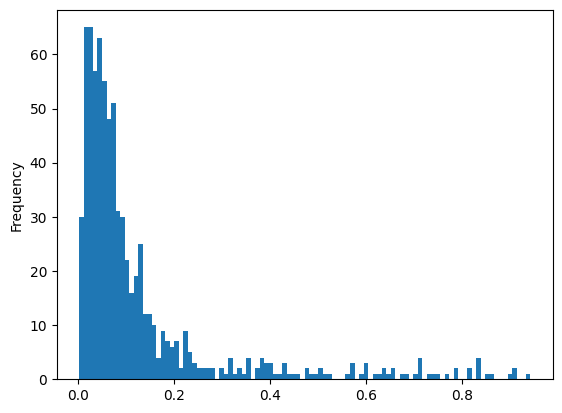

In [13]:
test_dataset.loc[test_dataset['satisfied'] == 0, 'score_lr'].plot.hist(bins=100, label='Negative')

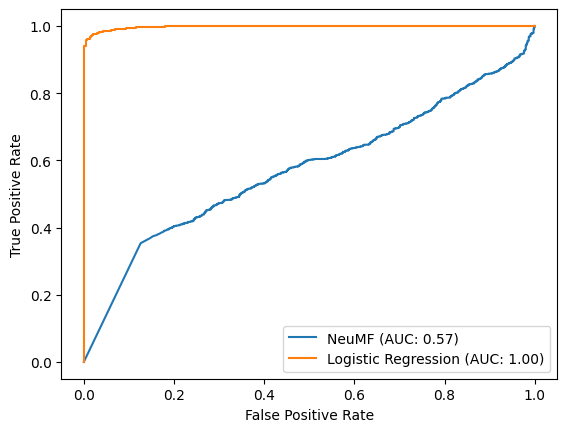

In [14]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
from matplotlib import pyplot as plt

fpr, tpr, _ = roc_curve(test_dataset['satisfied'], test_dataset['score'])
fpr_lr, tpr_lr, _ = roc_curve(test_dataset['satisfied'], test_dataset['score_lr'])

plt.plot(fpr, tpr, label='NeuMF (AUC: {:.2f})'.format(auc(fpr, tpr)))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC: {:.2f})'.format(auc(fpr_lr, tpr_lr)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

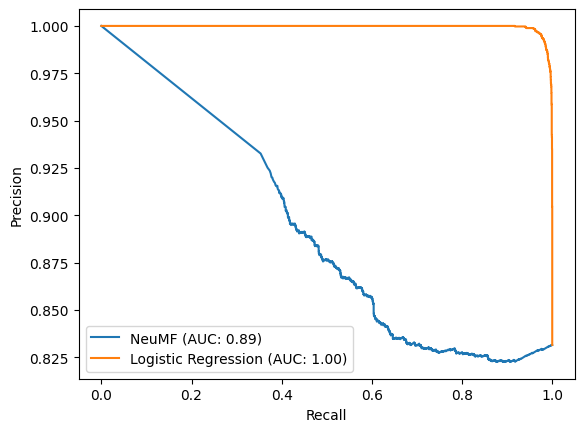

In [15]:
precision, recall, _ = precision_recall_curve(test_dataset['satisfied'], test_dataset['score'])
precision_lr, recall_lr, _ = precision_recall_curve(test_dataset['satisfied'], test_dataset['score_lr'])

plt.plot(recall, precision, label='NeuMF (AUC: {:.2f})'.format(auc(recall, precision)))
plt.plot(recall_lr, precision_lr, label='Logistic Regression (AUC: {:.2f})'.format(auc(recall_lr, precision_lr)))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()